In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [192]:
df = pd.read_csv('/content/Avg_year_with_Solar_thermal.csv', delimiter=',',index_col='Time')
df.index.freq = 'M'
df1 = pd.read_csv('/content/Extreme_Winter_Solar_thermal.csv', delimiter=',',index_col='Time')
df1.index.freq = 'M'

In [193]:
df

,Qdot_Storage_out
Time,
0,0.00000
600,98297.03856
1200,172080.13540
1800,173760.54670
2400,168253.91280
...,...
31533600,155349.44130
31534200,156197.68840
31534800,157045.94040


In [194]:
df1

,Qdot_Storage_out
Time,
0,0.00000
600,70624.20482
1200,141244.51400
1800,145511.96920
2400,139862.28550
...,...
31533600,134706.27350
31534200,134897.75490
31534800,135088.83570


In [231]:
TestData = df[2016:6480]
Training_Set = df.head(52561)
TestData.shape

(4464, 1)

In [196]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (52561, 1)
Test Set Shape  (4464, 1)


In [197]:
from sklearn.preprocessing import MinMaxScaler

In [198]:
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [199]:
#striding window numpy tricks
Train.shape

(52561, 1)

In [200]:
#[[ [5] [2] [3] [4]]
#[2] [3] [4] [5] [6]
X_Train = []
Y_Train = []

const= 144
for i in range(const, Train.shape[0]-const):
    
    X_Train.append(Train[i-const:i])
    
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
print(X_Train.shape)
print(Y_Train.shape)
print(Y_Train)

(52273, 144, 1)
(52273, 1)
[[0.64585796]
 [0.6299113 ]
 [0.62845262]
 ...
 [0.72866538]
 [0.72766232]
 [0.82477   ]]


In [201]:
X_Train[:,:].shape

(52273, 144, 1)

In [202]:
X_Train.shape[0]

52273

In [203]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1],1))
X_Train.shape

(52273, 144, 1)

In [98]:
pd.DataFrame(X_Train)

ValueError: ignored

In [204]:
Y_Train = np.reshape(Y_Train, newshape=(Y_Train.shape[0], Y_Train.shape[1]))
Y_Train.shape

(52273, 1)

In [205]:
pd.DataFrame(Y_Train)

,0
0,0.645858
1,0.629911
2,0.628453
3,0.627067
4,0.625365
...,...
52268,0.730620
52269,0.729634
52270,0.728665
52271,0.727662


In [206]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [207]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 128, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
#regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64, return_sequences = True))
#regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 64,return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 64))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 144, 128)          66560     
                                                                 
 lstm_16 (LSTM)              (None, 144, 64)           49408     
                                                                 
 lstm_17 (LSTM)              (None, 144, 64)           33024     
                                                                 
 lstm_18 (LSTM)              (None, 144, 64)           33024     
                                                                 
 lstm_19 (LSTM)              (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 215,105
Trainable params: 215,105
Non-tr

In [208]:
regressor.fit(X_Train, Y_Train, epochs = 20, batch_size = 100)

Epoch 1/20
523/523 [==============================] - 23s 32ms/step - loss: 0.0030
Epoch 2/20
523/523 [==============================] - 17s 32ms/step - loss: 4.6604e-04
Epoch 3/20
523/523 [==============================] - 17s 33ms/step - loss: 2.9746e-04
Epoch 4/20
523/523 [==============================] - 17s 32ms/step - loss: 1.6533e-04
Epoch 5/20
523/523 [==============================] - 17s 32ms/step - loss: 1.2325e-04
Epoch 6/20
523/523 [==============================] - 17s 32ms/step - loss: 9.7569e-05
Epoch 7/20
523/523 [==============================] - 17s 32ms/step - loss: 9.7898e-05
Epoch 8/20
523/523 [==============================] - 17s 32ms/step - loss: 8.5576e-05
Epoch 9/20
523/523 [==============================] - 17s 32ms/step - loss: 9.0225e-05
Epoch 10/20
523/523 [==============================] - 17s 32ms/step - loss: 8.4593e-05
Epoch 11/20
523/523 [==============================] - 17s 32ms/step - loss: 7.8982e-05
Epoch 12/20
523/523 [========================

In [ ]:
pd.concat((df1.head(45000),df1.tail(5000)),axis=0)

,Qdot_Storage_out
Time,
0,0.00000
600,127141.16500
1200,169058.33040
1800,165878.61720
2400,160474.54870
...,...
25196400,40282.63082
25197000,41378.54025
25197600,42555.34534


In [232]:
Df_Total = pd.concat((df1.head(46000), df.tail(6000)), axis=0)

In [233]:
Df_Total.shape

(52000, 1)

In [234]:
Df_Total[len(Df_Total)-len(TestData)-5000:].values

array([[ 60326.89324],
       [ 56076.93068],
       [ 52099.52194],
       ...,
       [157045.9404 ],
       [157893.1815 ],
       [150359.7957 ]])

In [235]:
inputs = Df_Total[len(Df_Total)-len(TestData):].values
inputs.shape

(4464, 1)

In [236]:
inputs=Df_Total
inputs.shape

(52000, 1)

In [237]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 144:].values

#need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)
const= 144
X_test = []

for i in range(const, inputs.shape[0]):
    X_test.append(inputs[i-const:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_Qdot_out_Storage = regressor.predict(X_test)

# inverse Transformation to get Values 
predicted_Qdot_out_Storage = sc.inverse_transform(predicted_Qdot_out_Storage)

  7/140 [>.............................] - ETA: 2s

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


140/140 [==============================] - 2s 13ms/step


In [238]:
True_Qdot_out = TestData["Qdot_Storage_out"].to_list()
Predicted_Qdot  = predicted_Qdot_out_Storage
Time = TestData.index.to_list()

In [239]:
Machine_Df = pd.DataFrame(data={
    "Time":Time,
    "True_Qdot_out": True_Qdot_out,
    "Predicted_Qdot_out":[x[0] for x in Predicted_Qdot]
})

In [240]:
Machine_Df

,Time,True_Qdot_out,Predicted_Qdot_out
0,1209600,205033.1596,86711.492188
1,1210200,187560.5962,97021.804688
2,1210800,188189.7314,103191.625000
3,1211400,186733.4917,106091.804688
4,1212000,185074.2018,106594.695312
...,...,...,...
4459,3885000,139387.6179,154054.375000
4460,3885600,139874.4257,154857.359375
4461,3886200,140446.2966,155719.031250
4462,3886800,141029.4604,156591.859375


In [242]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
rmse=sqrt(mean_squared_error(True_Qdot_out,predicted_Qdot_out_Storage))
mae=mean_absolute_error(True_Qdot_out, predicted_Qdot_out_Storage)
mae
#df_mse = [mean_squared_error(Machine_Df.True_Qdot_out[:(i+1)],
#Machine_Df.Predicted_Qdot_out[:(i+1)], squared=False) for i in range(Machine_Df.shape[0])]

29997.166821663304

In [35]:
True_Qdot=np.array(True_Qdot_out)
True_values=np.reshape(True_Qdot,(1000,1))

ValueError: ignored

In [36]:
rmse=sqrt(mean_squared_error(True_values,predicted_Qdot_out_Storage))
rmse

NameError: ignored

In [ ]:
mape=mean_absolute_error(True_values,predicted_Qdot_out_Storage)
mape

32885.681472283744

In [ ]:
df_rmse=np.sqrt(df_mse)
df_rmse

array([248.38631806, 243.78832238, 239.8846054 , 236.48140004,
       233.30840065, 230.27478117, 227.47175871, 225.97991624,
       225.23645095, 224.93503553, 224.73917015, 224.45474832,
       224.0507536 , 223.17747994, 222.17430304, 221.17659556,
       220.27005062, 219.47435874, 218.76082061, 218.05505455,
       217.50904716, 217.07268975, 216.67995409, 216.30124913,
       215.93977725, 215.78119356, 215.50737252, 215.22760252,
       215.04424147, 214.97327206, 214.97461174, 215.02225767,
       214.98336377, 214.82580821, 214.56612114, 214.23702868,
       213.86464019, 213.39064768, 213.04073533, 212.75683286,
       212.45902649, 212.11634873, 211.74318515, 211.29292198,
       210.82057011, 210.34155621, 209.85665037, 209.36097523,
       208.85006636, 208.52631287, 208.22211266, 207.90491732,
       207.5663947 , 207.20730515, 206.83271283, 206.32380672,
       205.79915921, 205.26786082, 204.72713452, 204.17593746,
       203.61566074, 203.11097903, 202.60332513, 202.09

In [31]:
True_Qdot = TestData["Qdot_Storage_out"].to_list()
Predicted_Temp  = [x[0] for x in Predicted_Qdot]
dates = TestData.index.to_list()

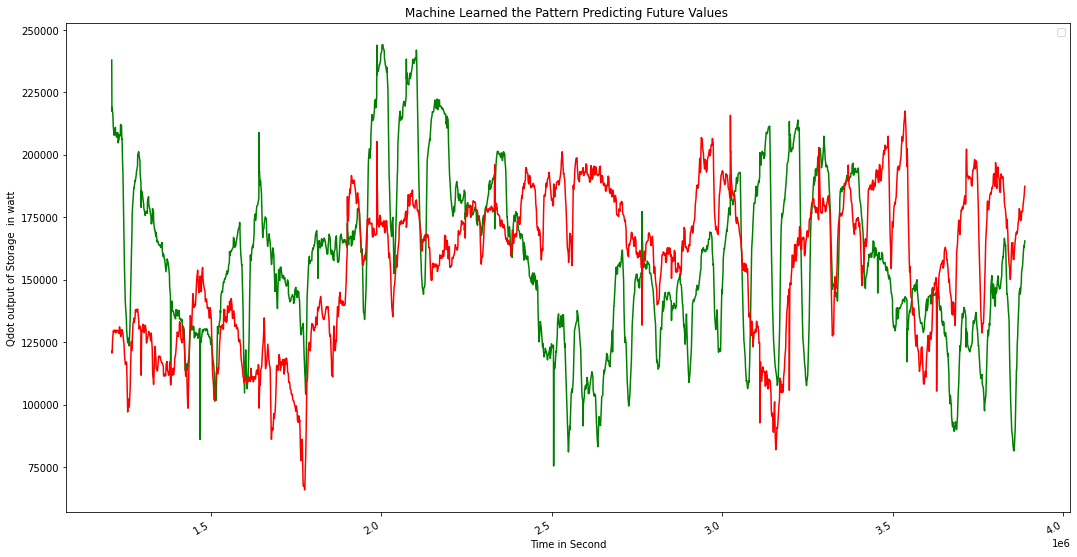

In [32]:
fig=plt.figure(figsize=(18,10))
train=df[:X_Train.shape[0]]
test=df1.tail(5000)

ax1= fig.add_subplot(111)

x = dates
y = True_Qdot

y1 = Predicted_Qdot

#plt.plot(Training_Set['Qdot_Storage_out'])
plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")

plt.gcf().autofmt_xdate()
plt.xlabel('Time in Second')
plt.ylabel("Qdot output of Storage  in watt")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()